# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [2]:
# Mounting Google Colab drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [3]:
import random

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

import tensorflow as tf

from keras.models import Sequential

from keras.layers import Dense, Dropout, Activation, BatchNormalization

from keras.losses import categorical_crossentropy

from keras.optimizers import Adam

from keras.utils import to_categorical

from keras import backend

backend.clear_session()

**Let us check the version of tensorflow.**

In [4]:
print(tf.__version__)

2.12.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [5]:
import h5py #This python library is used for opening HDF5 files
file_path = '/content/drive/MyDrive/MIT/elective/data/SVHN_single_grey1.h5'

with h5py.File(file_path, 'r') as f:
    # The  funtion list(f.keys()) provides the list of keys at the root level in the file.
    # We can now take a look at how the dataset is organized.
    # In the file the key are equivalent to pandas columns.
    print(list(f.keys()))
    X_train = f['X_train'][:]
    y_train = f['y_train'][:]
    X_test = f['X_test'][:]
    y_test = f['y_test'][:]

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


Check the number of images in the training and the testing dataset.

In [6]:
len(X_train), len(X_test)


(42000, 18000)

In [7]:
# If we look inside the training set X_train, we can see what is inside the dataset.
print(X_train[0])
# We can also determine the length of each image in the training set of X_train
print(len(X_train[0]))

[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]
32


**Observation:**
The dataset contains 42,000 images in the Training set and 18,000 images in the Testing set. Each image is a 32x32 matrix of numbers, consisting of the values of the individual pixels.

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

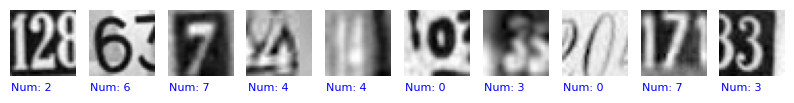

In [8]:
# The images are in matrix format, hence we can use the "figure" function from Matplotlib to plot them.
# This function plots the individual pixes within each matrix for the visualization of the images.
plt.figure(figsize = (10, 1))

# Let's plot the first 10 matrices (images) in the dataset.
for i in range(10):

    # For the subplot we have 1 row with 10 columns and we iterate for each of the 10 images.
    plt.subplot(1, 10, i+1)

    # As we iterate, We insert each image onto the canvas and display it and we use the color map "gray'.
    # Note: The colors are not the actual colors within the image, they only represent the differences of the numbers within the matrix.
    plt.imshow(X_train[i], cmap='gray')

    # To display the image better, we can turn the axis off.
    plt.axis('off')

    # The Y_train dataset contains the labels corresponding to each image in the X_train dataset.
    # We can display these labels for each image.
    plt.text(10, 40, f'Num: {y_train[i]}', ha='center', va='bottom', color='blue', fontsize=8)
# Plots the result of the for loop.
plt.show()

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

Print the shapes of Training and Test data

In [9]:
# This prints the first dataset which is 32 pixels by 32 pixels, that is a matrix of 1024 pixels.
# For color images i.e. that are in rgb, we have additionally channels, and each channel consists of a 32x32 matrix of pixels.
# For the current black and white images, we have a grayscale ranging from 0 to 255, 0 being black and 255 being white.
print("Shape:", X_train[0].shape)

Shape: (32, 32)


In [10]:
# Let's review the matrix of the first image in the training dataset.
print("First image:\n", X_train[0])

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [22]:
# We will flatten the 32x32 matrix dataset by using the reshape function fom numpy.
# We will create a  one dimensional array while preserving the data.
X_train = X_train.reshape(X_train.shape[0], 1024)

X_test = X_test.reshape(X_test.shape[0], 1024)

In [23]:
# Let's now print the shape of the Training and Test data sets after the reshape.
print("Shape of Training dataset:", X_train.shape, y_train.shape)
print("Shape of Test dataset:", X_test.shape, y_test.shape)

Shape of Training dataset: (42000, 1024) (42000, 10)
Shape of Test dataset: (18000, 1024) (18000, 10)


**Observation:** We can now see that the training dataset still has 42,000 images and the test dataset has 18,000 images. However each image is now a 1-dimensional matrix of 1024 numbers.

### **Normalize the train and the test data**

In [14]:
# We will now normalize the data, which basically fits all the data in a range from 0 to 1.
# We will normalized by dividig each of the values by 255.

# Normalize reshaped training dataset
X_train_normalized = X_train / 255.0

# Normalize reshaped testing dataset
X_test_normalized = X_test / 255.0

### **One-hot encode output**

In [15]:
# We now convert the integer class labels in the y_train dataset to a binary class matrix
# Each label is then represented as a vector of 0s and 1s.
# The to_categorical function from the tensorflow.keras.utils module converts the numerical values to one-hot encoded vectors.

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

In [20]:
# Print the labels from the test dataset that are now in one-hot encoded format.

print(y_test)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]]


**Observation:** We can see here that the first label from the test dataset
[0,1,0,0,0,0,0,0,0,0] which has been "one-hot encoded" represents the number 2.

## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

### **Plot the Training and Validation Accuracies and write down your Observations.**

**Observations:_______**

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

### **Plot the Training and Validation Accuracies and write down your Observations.**

**Observations:_______**

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

**Final Observations:__________**

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

Check the number of images in the training and the testing dataset.

**Observation:**


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

Normalize inputs from 0-255 to 0-1

Print New shape of Training and Test

### **One-hot encode the labels in the target variable y_train and y_test.**

**Observation:**


## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

### **Plot the Training and Validation Accuracies and Write your observations.**

**Observations:__________**

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

### **Plot the Training and Validation accuracies and write your observations.**

**Observations:________**

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

### **Write your final observations on the performance of the model on the test data.**

**Final Observations:_________**